**Fashion-MNIST/CNN** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as k
from keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

labels:5


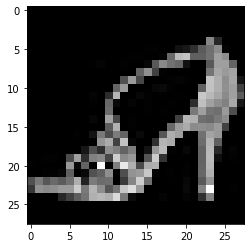

In [5]:
print("labels:{}".format(ytrain[8000]))
plt.imshow(xtrain[8000],cmap='gray')

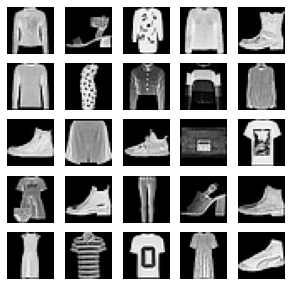

In [6]:
index=np.random.randint(0,xtrain.shape[0],size =25)
images=xtrain[index]
labels=ytrain[index]

plt.figure(figsize=(5,5))
for i in range(len(index)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    
plt.show()

In [7]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
classes=np.unique(ytrain)
nClasses= len(classes)
print('total number of outputs:',nClasses)
print(' outputs:',classes)

total number of outputs: 10
 outputs: [0 1 2 3 4 5 6 7 8 9]


**Reshape train and test data into compatible shape that is (number of examples, hight, width, channel)**

In [9]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)
xtrain.shape,xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**normalizing the dataset**

In [10]:
Xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain= xtrain/255
xtest= xtest/255

**one-hot encode the class vector**

In [11]:
ytrain=to_categorical(ytrain,num_classes=10)
ytest=to_categorical(ytest,num_classes=10)

**Building CNN**

In [12]:
#Define input Parameter
batch_size=64
epochs=20
num_calsses=10

In [13]:
fashion_mnist=Sequential()
fashion_mnist.add(Conv2D(filters=32,kernel_size=3,activation="LeakyReLU",input_shape=(28,28,1),padding='same',kernel_regularizer=keras.regularizers.l2(0.01)))
fashion_mnist.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_mnist.add(Dropout(rate=0.25))
fashion_mnist.add(Conv2D(filters=64,kernel_size=3,activation="LeakyReLU"))
fashion_mnist.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_mnist.add(Dropout(rate=0.25))
fashion_mnist.add(Conv2D(filters=128,kernel_size=3,activation="LeakyReLU"))
fashion_mnist.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_mnist.add(Dropout(rate=0.25))
fashion_mnist.add(Flatten()) 
fashion_mnist.add(Dense(128,activation="LeakyReLU"))
fashion_mnist.add(Dropout(rate=0.25))
fashion_mnist.add(Dense(10,activation="softmax"))

In [14]:
fashion_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

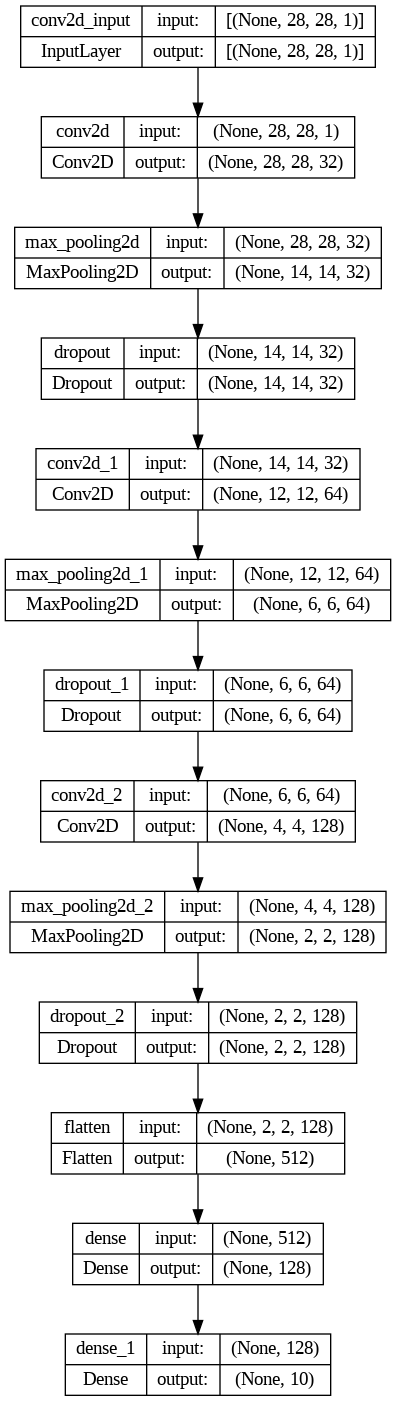

In [15]:
plot_model(fashion_mnist,show_shapes=True)

In [17]:
fashion_mnist.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
h=fashion_mnist.fit(xtrain,ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.3)

Epoch 1/20
657/657 [==============================] - 17s 8ms/step - loss: 0.6417 - accuracy: 0.7713 - val_loss: 0.4205 - val_accuracy: 0.8561
Epoch 2/20
657/657 [==============================] - 5s 7ms/step - loss: 0.4150 - accuracy: 0.8547 - val_loss: 0.3557 - val_accuracy: 0.8771
Epoch 3/20
657/657 [==============================] - 5s 7ms/step - loss: 0.3673 - accuracy: 0.8691 - val_loss: 0.3361 - val_accuracy: 0.8819
Epoch 4/20
657/657 [==============================] - 7s 11ms/step - loss: 0.3370 - accuracy: 0.8800 - val_loss: 0.2996 - val_accuracy: 0.8949
Epoch 5/20
657/657 [==============================] - 6s 9ms/step - loss: 0.3171 - accuracy: 0.8863 - val_loss: 0.3101 - val_accuracy: 0.8915
Epoch 6/20
657/657 [==============================] - 4s 6ms/step - loss: 0.3052 - accuracy: 0.8897 - val_loss: 0.2757 - val_accuracy: 0.9012
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.2912 - accuracy: 0.8955 - val_loss: 0.3086 - val_accuracy: 0.8898
Epoc

In [19]:
loss,acc=fashion_mnist.evaluate(xtest,ytest)
print("test accuracy:",acc)
print("test loss:",loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9115
test accuracy: 0.9114999771118164
test loss: 0.2559528946876526


In [20]:
loss,acc=fashion_mnist.evaluate(xtrain,ytrain)
print("test accuracy:",acc)
print("test loss:",loss)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1814 - accuracy: 0.9359
test accuracy: 0.9359166622161865
test loss: 0.18139566481113434


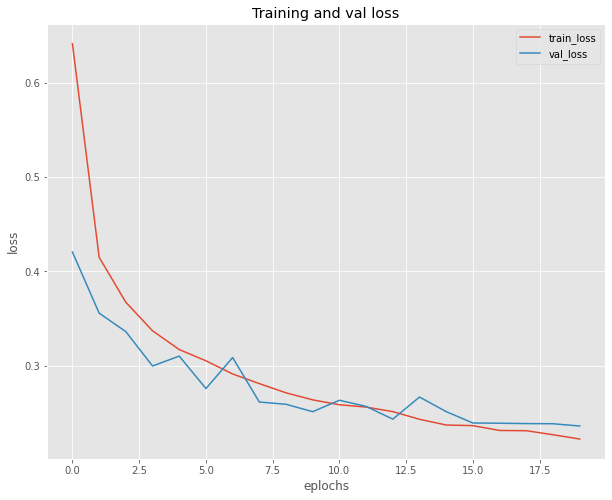

In [21]:
epochs=np.arange(0, len(h.history['loss']))
plt.figure(figsize=(10,8))


plt.style.use("ggplot")
plt.plot(epochs,h.history["loss"],label="train_loss")
plt.plot(epochs,h.history["val_loss"], label="val_loss")
plt.title("Training and val loss")
plt.xlabel("eplochs")
plt.ylabel("loss")
plt.legend()

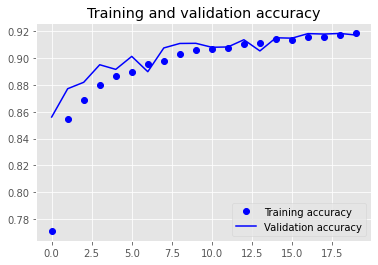

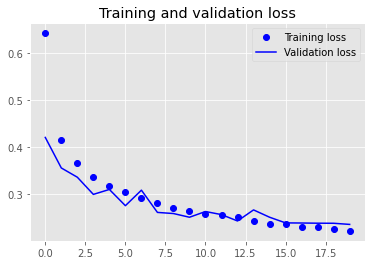

In [23]:
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 160ms/step
predicted label: 6
output: [[2.8978908e-01 2.4367846e-09 4.4275381e-05 4.3424958e-04 5.0117997e-06
  3.8734346e-10 7.0972711e-01 7.6548090e-10 3.3388724e-07 9.0582386e-10]]
1.0000001


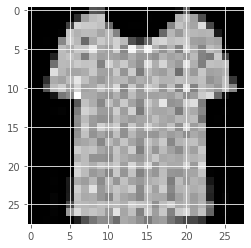

In [24]:
plt.imshow(xtest[1000].reshape(28,28),cmap='gray')
ypred=fashion_mnist.predict(xtest[1000].reshape(1,28,28,1))
print("predicted label:",ypred.argmax())
print("output:",ypred)
print(ypred.sum())